In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geogebra

In [2]:
def get_projection(alfa,beta):
    C1=np.array([0,-1,0])
    C2=np.array([-np.cos(np.pi*30/180),np.sin(np.pi*30/180),0])
    C3=np.array([np.cos(np.pi*30/180),np.sin(np.pi*30/180),0])
    xp=np.array([np.cos(alfa),0,np.sin(alfa)])
    yp=np.array([0,np.cos(beta),np.sin(beta)])
    zp=np.cross(xp,yp)
    zp=zp/(np.linalg.norm(zp))
    xp=np.cross(yp,zp)
    print(f"xp norm={np.linalg.norm(xp)}")
    print(f"yp norm={np.linalg.norm(yp)}")
    print(f"zp norm={np.linalg.norm(zp)}")
    print(f"xp ={xp}")
    print(f"yp ={yp}")
    print(f"zp ={zp}")
    
    M=np.array([xp,yp,zp]).T

    print(f"M={M}")
    offset=C1
    C1t=np.dot(M,C1)
    C2t=np.dot(M,C2)
    C3t=np.dot(M,C3)
    print(f"C1={C1}")
    print(f"C2={C2}")
    print(f"C3={C3}")
    
    print(f"C12={np.linalg.norm(C1-C2)}")
    print(f"C23={np.linalg.norm(C2-C3)}")
    print(f"C31={np.linalg.norm(C3-C1)}")
    print(f"C12t={np.linalg.norm(C1t-C2t)}")
    print(f"C23t={np.linalg.norm(C2t-C3t)}")
    print(f"C31t={np.linalg.norm(C3t-C1t)}") 
    
    points=np.array([C1t,C2t,C3t])
    x, y,z = zip(*points)
    colors=[0,0,0,100,100,100]
    plt.scatter(x, y, c=z)
    plt.colorbar();  # show color scale
    return C1t[0:2],C2t[0:2],C3t[0:2]


xp norm=1.0
yp norm=0.9999999999999999
zp norm=1.0
xp =[ 0.99800867 -0.06211863  0.01095319]
yp =[0.         0.17364818 0.98480775]
zp =[-0.06307691 -0.98284667  0.17330239]
M=[[ 0.99800867  0.         -0.06307691]
 [-0.06211863  0.17364818 -0.98284667]
 [ 0.01095319  0.98480775  0.17330239]]
C1=[ 0 -1  0]
C2=[-0.8660254  0.5        0.       ]
C3=[0.8660254 0.5       0.       ]
C12=1.7320508075688772
C23=1.7320508075688774
C31=1.7320508075688772
C12t=1.7320508075688772
C23t=1.7320508075688776
C31t=1.7320508075688774


(array([ 0.        , -0.17364818]),
 array([-0.86430086,  0.1406204 ]),
 array([0.86430086, 0.03302778]))

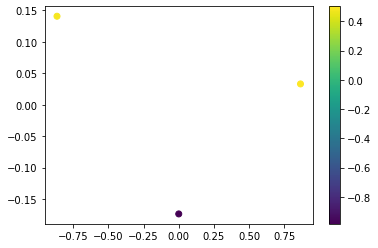

In [3]:
get_projection(20*np.pi/180,80*np.pi/180)

In [4]:
M=np.array([x,y,z])

NameError: name 'x' is not defined

In [ ]:
points

In [5]:
rotar_vector(90*np.pi/180,-90*np.pi/180,np.array([1,0,0]))

NameError: name 'rotar_vector' is not defined

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import limb
import basis

#Function that performs the rotation
def rotate_vector(ang_x,ang_y,p):
    Mx=np.array([[1,0,0],[0,np.cos(ang_x),-np.sin(ang_x)],[0,np.sin(ang_x),np.cos(ang_x)]])
    My=np.array([[np.cos(ang_y),0,np.sin(ang_y)],[0,1,0],[-np.sin(ang_y),0,np.cos(ang_y)]])
    Mxy=np.dot(Mx,My)
    p_rot=np.dot(Mxy,p)
    return p_rot

#positions of the ball joins when they are unactuated
dist=6
C1=dist*np.array([0,-1,0])
C2=dist*np.array([-np.cos(np.pi*30/180),np.sin(np.pi*30/180),0])
C3=dist*np.array([np.cos(np.pi*30/180),np.sin(np.pi*30/180),0])
#angles to perform
ang_x=18*np.pi/180
ang_y=0*np.pi/180
#making the rotation of the joints
C1r=rotate_vector(ang_x,ang_y,C1)
C2r=rotate_vector(ang_x,ang_y,C2)
C3r=rotate_vector(ang_x,ang_y,C3)
#calculo el angulo de los motores
P1=basis.base_change_cannon_to_m1(C1r)+np.array([0,10,14])
P2=basis.base_change_cannon_to_m2(C2r)+np.array([0,10,14])
P3=basis.base_change_cannon_to_m3(C3r)+np.array([0,10,14])

limb_i=limb.limb(l1=6,l2=12)
ang1=limb_i.calculate_motor_angle(P1,0.01,30)
ang2=limb_i.calculate_motor_angle(P2,0.01,30)
ang3=limb_i.calculate_motor_angle(P3,0.01,30)

In [37]:
ang1*180/np.pi

2.4935268755504407

In [38]:
ang2*180/np.pi

29.691219831952974

In [39]:
ang3*180/np.pi

29.691219831952974

In [12]:
P1

array([ 0,  4, 12])

In [13]:
P2

array([ 0.,  4., 12.])

In [14]:
P3

array([ 0.,  4., 12.])

In [15]:
C1

array([ 0, -6,  0])

In [16]:
C2

array([-5.19615242,  3.        ,  0.        ])

In [17]:
C3

array([5.19615242, 3.        , 0.        ])